In [76]:
# importing libraries
import numpy as np
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB


In [77]:
# reading in the data/csv
wine_df = pd.read_csv('/Users/alecavery/Desktop/DS Course/Capstone/archive/winemag-data-130k-v2.csv')

In [78]:
# inspecting the columns
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [79]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129971.0,64985.000000,37519.540256,0.0,32492.5,64985.0,97477.5,129970.0
points,129971.0,88.447138,3.039730,80.0,86.0,88.0,91.0,100.0
price,120975.0,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0


In [80]:
# dropping redundant index column
wine_df.drop('Unnamed: 0', axis=1, inplace=True)

In [81]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [82]:
wine_df.tail()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [83]:
wine_df.sample(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
105580,France,"Big and dry, this wine shows the tannic, firm ...",NaN,88,NaN,Bordeaux,Montagne-Saint-Émilion,NaN,Roger Voss,@vossroger,Château Teyssier 2011 Montagne-Saint-Émilion,Bordeaux-style Red Blend,Château Teyssier
111790,Italy,"Vibrant and linear, this opens with aromas of ...",NaN,90,32.0,Piedmont,Lessona,NaN,Kerin O’Keefe,@kerinokeefe,Tenute Sella 2010 Lessona,Red Blend,Tenute Sella
59822,Italy,This is a rich and succulent wine made from Ca...,La Regola,93,42.0,Tuscany,Montescudaio,NaN,NaN,NaN,La Regola 2004 La Regola Cabernet Franc (Monte...,Cabernet Franc,La Regola
122799,US,Camiana has been establishing a real track rec...,Blue Hall Vineyard,93,75.0,California,Howell Mountain,Napa,NaN,NaN,Camiana 2008 Blue Hall Vineyard Cabernet Sauvi...,Cabernet Sauvignon,Camiana
63070,US,"Blended with 10% Mourvèdre and 5% Grenache, wi...",NaN,91,32.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Damsel 2012 Syrah (Columbia Valley (WA)),Syrah,Damsel
32700,Portugal,"This wine is firmly tannic, while promising fi...",Follies Nossa Senhora da Vandoma,90,11.0,Bairrada,NaN,NaN,Roger Voss,@vossroger,Aveleda 2013 Follies Nossa Senhora da Vandoma ...,Touriga Nacional-Cabernet Sauvignon,Aveleda
129367,US,"A big, strong Chardonnay that's impressive for...",Estate Block K-1,87,38.0,California,Santa Lucia Highlands,Central Coast,NaN,NaN,McIntyre Vineyards 2010 Estate Block K-1 Chard...,Chardonnay,McIntyre Vineyards
55165,US,"Kiwi, pineapple and herb aromas are followed b...",Linen,87,12.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Bergevin Lane 2015 Linen Sauvignon Blanc (Colu...,Sauvignon Blanc,Bergevin Lane
34744,US,"This tight, classic Russian River Valley Pinot...",Floodgate Vineyard,92,42.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Joseph Jewell 2011 Floodgate Vineyard Pinot No...,Pinot Noir,Joseph Jewell
74320,France,This ripe wine is full of tropical and citrus ...,Cuvée Prestige,89,10.0,Bordeaux,Bordeaux Blanc,NaN,Roger Voss,@vossroger,Château Haut Guillebot 2011 Cuvée Prestige (B...,Sémillon,Château Haut Guillebot


In [84]:
# filling any blank object data type columns with a blank space so it's readable (may come back to this to see if needed)
wine_df.designation = wine_df.designation.fillna('')
wine_df.country = wine_df.country.fillna('')
wine_df.province = wine_df.province.fillna('')
wine_df.region_1 = wine_df.region_1.fillna('')
wine_df.region_2 = wine_df.region_2.fillna('')
wine_df.taster_name = wine_df.taster_name.fillna('')
wine_df.taster_twitter_handle = wine_df.taster_twitter_handle.fillna('')
wine_df.variety = wine_df.variety.fillna('')

In [85]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   region_2               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [86]:
wine_df = wine_df[~wine_df['variety'].str.contains('blend', case=False)]


In [87]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104241 entries, 1 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                104241 non-null  object 
 1   description            104241 non-null  object 
 2   designation            104241 non-null  object 
 3   points                 104241 non-null  int64  
 4   price                  98280 non-null   float64
 5   province               104241 non-null  object 
 6   region_1               104241 non-null  object 
 7   region_2               104241 non-null  object 
 8   taster_name            104241 non-null  object 
 9   taster_twitter_handle  104241 non-null  object 
 10  title                  104241 non-null  object 
 11  variety                104241 non-null  object 
 12  winery                 104241 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.1+ MB


In [88]:
# checking the unique wine varities and their respective amounts in the data set
variety_counts = wine_df['variety'].value_counts()
variety_counts.head(200)


variety
Pinot Noir               13272
Chardonnay               11753
Cabernet Sauvignon        9472
Riesling                  5189
Sauvignon Blanc           4967
                         ...  
Cabernet Franc-Merlot       20
Malbec-Syrah                20
Orange Muscat               20
Syrah-Mourvèdre             20
Nero di Troia               19
Name: count, Length: 200, dtype: int64

In [89]:
type(wine_df.description[1])

str

In [90]:
# removing stopwords from the description column values
stopwords = set(stopwords.words('english'))

In [91]:
detokenizer = TreebankWordDetokenizer()

In [92]:
def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

In [93]:
wine_df["cleaned_description"] = wine_df["description"].apply(clean_description)

In [94]:
wine_df["cleaned_description"]

1         ripe fruity wine smooth still structured firm ...
2         tart snappy flavors lime flesh rind dominate g...
3         pineapple rind lemon pith orange blossom start...
4         much like regular bottling comes across rather...
5         blackberry raspberry aromas show typical navar...
                                ...                        
129966    notes honeysuckle cantaloupe sweeten delicious...
129967    citation given much decade bottle age prior re...
129968    gravel soil gives wine crisp dry character rip...
129969    dry style pinot gris crisp acidity also weight...
129970    big rich powered intense spiciness rounded tex...
Name: cleaned_description, Length: 104241, dtype: object

In [95]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104241 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                104241 non-null  object 
 1   description            104241 non-null  object 
 2   designation            104241 non-null  object 
 3   points                 104241 non-null  int64  
 4   price                  98280 non-null   float64
 5   province               104241 non-null  object 
 6   region_1               104241 non-null  object 
 7   region_2               104241 non-null  object 
 8   taster_name            104241 non-null  object 
 9   taster_twitter_handle  104241 non-null  object 
 10  title                  104241 non-null  object 
 11  variety                104241 non-null  object 
 12  winery                 104241 non-null  object 
 13  cleaned_description    104241 non-null  object 
dtypes: float64(1), int64(1), object(12)
memor

In [96]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,cleaned_description
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity wine smooth still structured firm ...
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavors lime flesh rind dominate g...
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottling comes across rather...
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,blackberry raspberry aromas show typical navar...


In [97]:
#checking to see which rows mention the varietal in the description column

# Create a boolean mask
mask = wine_df.apply(lambda row: row['variety'].lower() in row['description'].lower(), axis=1)

# Apply the mask to keep only the rows where the condition is True
wine_df_mention = wine_df[mask]

In [98]:
wine_df_mention.info()
wine_df_mention.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25191 entries, 15 to 129969
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                25191 non-null  object 
 1   description            25191 non-null  object 
 2   designation            25191 non-null  object 
 3   points                 25191 non-null  int64  
 4   price                  24074 non-null  float64
 5   province               25191 non-null  object 
 6   region_1               25191 non-null  object 
 7   region_2               25191 non-null  object 
 8   taster_name            25191 non-null  object 
 9   taster_twitter_handle  25191 non-null  object 
 10  title                  25191 non-null  object 
 11  variety                25191 non-null  object 
 12  winery                 25191 non-null  object 
 13  cleaned_description    25191 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.9+ MB

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,cleaned_description
15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,,,Anna Lee C. Iijima,,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking,zesty orange peels apple notes abound sprightl...
29,US,Clarksburg is becoming a haven for Chenin Blan...,,86,16.0,California,Clarksburg,Central Valley,Virginie Boone,@vboone,Clarksburg Wine Company 2010 Chenin Blanc (Cla...,Chenin Blanc,Clarksburg Wine Company,clarksburg becoming chenin blanc california bo...
34,US,"This shows a tart, green gooseberry flavor tha...",,86,20.0,California,Sonoma Valley,Sonoma,,,Envolve 2011 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,Envolve,shows tart green gooseberry flavor similar new...
40,Italy,Catarratto is one of Sicily's most widely farm...,,86,17.0,Sicily & Sardinia,Sicilia,,,,Feudo Montoni 2011 Catarratto (Sicilia),Catarratto,Feudo Montoni,catarratto one sicily widely farmed white grap...
43,US,"The clean, brisk mouthfeel gives this slightly...",,86,14.0,California,Paso Robles,Central Coast,,,Robert Hall 2011 Sauvignon Blanc (Paso Robles),Sauvignon Blanc,Robert Hall,clean brisk mouthfeel gives slightly oaked sau...


In [99]:
#removing any rows where the varietal is mentioned in the description column

# Create a boolean mask
mask = wine_df.apply(lambda row: row['variety'].lower() not in row['description'].lower(), axis=1)

# Apply the mask to keep only the rows where the condition is True
wine_df_filtered = wine_df[mask]

In [100]:
wine_df_filtered.info()
wine_df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 79050 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                79050 non-null  object 
 1   description            79050 non-null  object 
 2   designation            79050 non-null  object 
 3   points                 79050 non-null  int64  
 4   price                  74206 non-null  float64
 5   province               79050 non-null  object 
 6   region_1               79050 non-null  object 
 7   region_2               79050 non-null  object 
 8   taster_name            79050 non-null  object 
 9   taster_twitter_handle  79050 non-null  object 
 10  title                  79050 non-null  object 
 11  variety                79050 non-null  object 
 12  winery                 79050 non-null  object 
 13  cleaned_description    79050 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.0+ MB


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,cleaned_description
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity wine smooth still structured firm ...
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavors lime flesh rind dominate g...
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottling comes across rather...
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,blackberry raspberry aromas show typical navar...


In [101]:
# checking the unique wine varities and their respective amounts in the data set
variety_counts = wine_df_filtered['variety'].value_counts()
variety_counts.head(200)

variety
Pinot Noir                           10958
Cabernet Sauvignon                    8788
Chardonnay                            8360
Sauvignon Blanc                       3797
Riesling                              2944
                                     ...  
Hondarrabi Zuri                         16
Castelão                                16
Cabernet Franc-Cabernet Sauvignon       16
Traminer                                16
Syrah-Petite Sirah                      16
Name: count, Length: 200, dtype: int64

In [102]:
wine_df_filtered = wine_df_filtered[~wine_df_filtered['variety'].str.contains('-')]
wine_df_filtered.info()
wine_df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 77045 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                77045 non-null  object 
 1   description            77045 non-null  object 
 2   designation            77045 non-null  object 
 3   points                 77045 non-null  int64  
 4   price                  72266 non-null  float64
 5   province               77045 non-null  object 
 6   region_1               77045 non-null  object 
 7   region_2               77045 non-null  object 
 8   taster_name            77045 non-null  object 
 9   taster_twitter_handle  77045 non-null  object 
 10  title                  77045 non-null  object 
 11  variety                77045 non-null  object 
 12  winery                 77045 non-null  object 
 13  cleaned_description    77045 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 8.8+ MB


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,cleaned_description
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity wine smooth still structured firm ...
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavors lime flesh rind dominate g...
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottling comes across rather...
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,bright informal red opens aromas candied berry...


In [103]:
variety_counts = wine_df_filtered['variety'].value_counts()
variety_counts.head()

variety
Pinot Noir            10958
Cabernet Sauvignon     8788
Chardonnay             8360
Sauvignon Blanc        3797
Riesling               2944
Name: count, dtype: int64

In [104]:
freq_varietals = variety_counts[variety_counts >= 50].index
wine_df_filtered = wine_df_filtered[wine_df_filtered['variety'].isin(freq_varietals)]
wine_df_filtered.info()
wine_df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 74148 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                74148 non-null  object 
 1   description            74148 non-null  object 
 2   designation            74148 non-null  object 
 3   points                 74148 non-null  int64  
 4   price                  69586 non-null  float64
 5   province               74148 non-null  object 
 6   region_1               74148 non-null  object 
 7   region_2               74148 non-null  object 
 8   taster_name            74148 non-null  object 
 9   taster_twitter_handle  74148 non-null  object 
 10  title                  74148 non-null  object 
 11  variety                74148 non-null  object 
 12  winery                 74148 non-null  object 
 13  cleaned_description    74148 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 8.5+ MB


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,cleaned_description
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity wine smooth still structured firm ...
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavors lime flesh rind dominate g...
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottling comes across rather...
7,France,This dry and restrained wine offers spice in p...,,87,24.0,Alsace,Alsace,,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,dry restrained wine offers spice profusion bal...


In [105]:
variety_counts = wine_df_filtered['variety'].value_counts()
variety_counts.head(100)

variety
Pinot Noir                10958
Cabernet Sauvignon         8788
Chardonnay                 8360
Sauvignon Blanc            3797
Riesling                   2944
                          ...  
Falanghina                   55
Verdelho                     52
Ribolla Gialla               52
Vidal Blanc                  50
Gros and Petit Manseng       50
Name: count, Length: 92, dtype: int64

In [106]:
word_occurrence = wine_df["cleaned_description"].str.split(expand=True).stack().value_counts()

In [107]:
total_words = sum(word_occurrence)

In [108]:
#plotting the most common words in the cleaned_description column by %
common_words = word_occurrence[:30]/total_words*100

Text(0.5, 1.0, 'Percentage of Occurrence of Most Frequent Words')

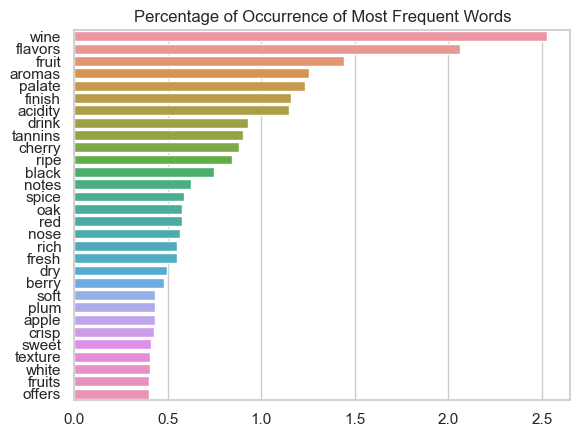

In [109]:
#creating a bar plot to show the most common words in the wine descriptions
sns.set(style="whitegrid")
ax = sns.barplot(x = common_words.values, y = common_words.index)
ax.set_title('Percentage of Occurrence of Most Frequent Words')

In [110]:
#splitting out the features and target
features = wine_df_filtered.cleaned_description
target = wine_df_filtered.variety

In [111]:
#splitting the data into training and testing sets
f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=.2)

In [112]:
#using tfidf vectorizer to transform the features 
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
f_train_tfidf = tfidf.fit_transform(f_train)
f_test_tfidf = tfidf.transform(f_test)

In [113]:
#using random forest classifier to fit the training data and predict the testing data with tfidf vectorizer
rf_classifier = RandomForestClassifier(n_estimators=200)
rf_classifier.fit(f_train_tfidf, t_train)
rf_classifier.score(f_test_tfidf, t_test)
rf_predictions = rf_classifier.predict(f_test_tfidf)
print(classification_report(t_test, rf_predictions))

                               precision    recall  f1-score   support

                    Aglianico       0.90      0.17      0.29        52
                     Albariño       1.00      0.19      0.32        83
                       Arneis       0.86      0.29      0.43        21
                      Barbera       1.00      0.25      0.40        76
                Blaufränkisch       1.00      0.11      0.20        37
                      Bonarda       1.00      0.08      0.15        12
               Cabernet Franc       0.97      0.14      0.24       207
           Cabernet Sauvignon       0.51      0.83      0.63      1734
                    Carmenère       1.00      0.20      0.33        71
                   Chardonnay       0.46      0.94      0.62      1672
                 Chenin Blanc       0.80      0.14      0.23       117
                      Cortese       1.00      0.25      0.40        12
Corvina, Rondinella, Molinara       0.92      0.55      0.69       118
     

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [114]:
#using count vectorizer to fit and/or transform the features and MultinomialNB to fit the training data and predict the testing data
vect = CountVectorizer()
f_train_vect = vect.fit_transform(f_train)
f_test_vect = vect.transform(f_test)
nb_classifier = MultinomialNB()
nb_classifier.fit(f_train_vect, t_train)
nb_classifier.score(f_test_vect, t_test)
nb_predictions = nb_classifier.predict(f_test_vect)
print(classification_report(t_test, nb_predictions))

                               precision    recall  f1-score   support

                    Aglianico       0.00      0.00      0.00        52
                     Albariño       0.00      0.00      0.00        83
                       Arneis       0.00      0.00      0.00        21
                      Barbera       0.00      0.00      0.00        76
                Blaufränkisch       0.00      0.00      0.00        37
                      Bonarda       0.00      0.00      0.00        12
               Cabernet Franc       0.67      0.01      0.02       207
           Cabernet Sauvignon       0.49      0.78      0.60      1734
                    Carmenère       0.00      0.00      0.00        71
                   Chardonnay       0.50      0.89      0.64      1672
                 Chenin Blanc       0.00      0.00      0.00       117
                      Cortese       0.00      0.00      0.00        12
Corvina, Rondinella, Molinara       0.75      0.42      0.54       118
     

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [115]:
#using multinomialNB to fit the training data and predict the testing data with tfidf vectorizer
nb_classifier.fit(f_train_tfidf, t_train)
nb_classifier.score(f_test_tfidf, t_test)
nb_predictions = nb_classifier.predict(f_test_tfidf)
print(classification_report(t_test, nb_predictions))



                               precision    recall  f1-score   support

                    Aglianico       0.00      0.00      0.00        52
                     Albariño       0.00      0.00      0.00        83
                       Arneis       0.00      0.00      0.00        21
                      Barbera       0.00      0.00      0.00        76
                Blaufränkisch       0.00      0.00      0.00        37
                      Bonarda       0.00      0.00      0.00        12
               Cabernet Franc       0.00      0.00      0.00       207
           Cabernet Sauvignon       0.44      0.84      0.57      1734
                    Carmenère       0.00      0.00      0.00        71
                   Chardonnay       0.42      0.93      0.57      1672
                 Chenin Blanc       0.00      0.00      0.00       117
                      Cortese       0.00      0.00      0.00        12
Corvina, Rondinella, Molinara       0.97      0.24      0.38       118
     

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [116]:
#using random forest classifier to fit the training data and predict the testing data with count vectorizer
rf_classifier.fit(f_train_vect, t_train)
rf_classifier.score(f_test_vect, t_test)
rf_predictions = rf_classifier.predict(f_test_vect)
print(classification_report(t_test, rf_predictions))


                               precision    recall  f1-score   support

                    Aglianico       1.00      0.17      0.30        52
                     Albariño       0.94      0.19      0.32        83
                       Arneis       1.00      0.29      0.44        21
                      Barbera       1.00      0.26      0.42        76
                Blaufränkisch       1.00      0.11      0.20        37
                      Bonarda       1.00      0.08      0.15        12
               Cabernet Franc       0.97      0.14      0.24       207
           Cabernet Sauvignon       0.49      0.86      0.63      1734
                    Carmenère       1.00      0.20      0.33        71
                   Chardonnay       0.47      0.96      0.63      1672
                 Chenin Blanc       1.00      0.14      0.24       117
                      Cortese       1.00      0.25      0.40        12
Corvina, Rondinella, Molinara       0.85      0.53      0.66       118
     

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
